<a id='top'><img src='src/top.webp' style='float:center; width:1000px;'></a>

# <center>[Intro to AI] HW1</center>
## <div class="pull-right">2017025769 신선웅</div>

## Background
<br>
<div>
Assuming that the (unknown) true model , we'll be fitting a polynomial model to sampled data with changing the degree of a polynomial function.<br> 
$h(x) = w_0 + w_1x^1 + w_2x^2 + ... + w_dx^d$ <br>
for understanding the concept of over-fitting as well as model selction.
</div>

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Assignment</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#setting" role="tab" aria-controls="profile">Setting<span class="badge badge-primary badge-pill">0</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#training" role="tab" aria-controls="profile">Make a training data<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#validation" role="tab" aria-controls="messages">Make a validation data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#plot" role="tab" aria-controls="settings">Plot the true model f(x) and training data<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#degree" role="tab" aria-controls="settings">Changing the polynomial degree<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#MSE" role="tab" aria-controls="settings">Plot the MSE<span class="badge badge-primary badge-pill">5</span></a>

# <a id='setting'>0. Setting</a>

### 📚Libraries for HW1

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use(['seaborn-notebook'])
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

### 🏃Make $\epsilon$ ~ $N(0, 0.5^2)$

In [2]:
np.random.seed(100)

In [3]:
e_21 = np.random.normal(0, 0.5, 21)
e_21

array([-0.87488274,  0.1713402 ,  0.5765179 , -0.12621802,  0.49066039,
        0.25710942,  0.11058983, -0.53502167, -0.09474792,  0.12750072,
       -0.22901349,  0.21758174, -0.29179753,  0.40842354,  0.3363604 ,
       -0.05220557, -0.26564019,  0.51486634, -0.21906781, -0.55915912,
        0.80949083])

In [4]:
e_10= np.random.normal(0, 0.5, 10)
e_10

array([ 0.77080259, -0.12593957, -0.42121787,  0.09225935,  0.4685411 ,
        0.36550017,  0.68077806, -0.16311903,  0.02783801,  0.1111998 ])

# <a id='training'>1. Make a training data</a>

> **Make a training data $x_{train}$**, which is evenly spaced 21 numbers over $[-\pi, \pi]$, and <br>$y_{train} = f(x_{train}) + \epsilon$ where $\epsilon$ ~ $N(0, 0.5^2)$ is i.i.d. samples from Gaussian distribution.

In [5]:
x_train = np.linspace(-np.pi, np.pi, 21)
x_train

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
        3.14159265])

In [6]:
y_train = np.sin(x_train) + e_21
y_train

array([-0.87488274, -0.13767679, -0.01126735, -0.93523501, -0.46039612,
       -0.74289058, -0.84046668, -1.34403866, -0.68253317, -0.18151627,
       -0.22901349,  0.52659874,  0.29598773,  1.21744053,  1.28741692,
        0.94779443,  0.68541633,  1.32388334,  0.36871744, -0.25014213,
        0.80949083])

# <a id='validation'>2. Make a validation data</a>

> **Make a validation data $x_{val}$**, which is evenly spaced 10 numbers over $[-\pi, \pi]$, and <br>$y_{val} = f(x_{val}) + \epsilon$ where $\epsilon$ ~ $N(0, 0.5^2)$ is i.i.d. samples from Gaussian distribution.

In [7]:
x_val = np.linspace(-np.pi, np.pi, 10)
x_val

array([-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
        0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265])

In [8]:
y_val = np.sin(x_val) + e_10
y_val

array([ 0.77080259, -0.76872718, -1.40602562, -0.77376606,  0.12652096,
        0.70752032,  1.54680347,  0.82168872,  0.67062562,  0.1111998 ])

# <a id='plot'>3. Plot the true model f(x) and training data</a>

> Plot the true model and training data as follows: <br>
📌Note: Add xlabel, ylabel, title, and legend <br>

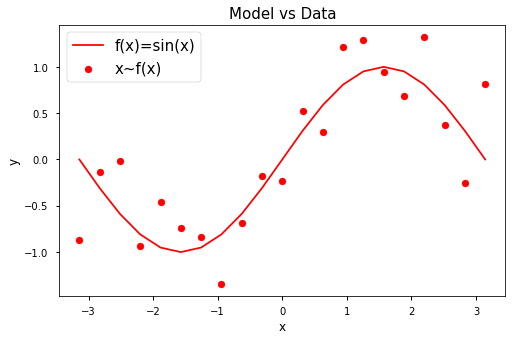

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(x_train, np.sin(x_train), 'r-', label='f(x)=sin(x)')
plt.scatter(x_train, y_train, color='r', label='x~f(x)')
plt.title('Model vs Data', fontsize=15)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(loc='upper left', prop={'size': 15}, edgecolor='gray')
plt.show()

# <a id='degree'>4. Changing the polynomial degree</a>

> Repeat the following steps by changing the polynomial degree from 0 to 9.

In [10]:
params = np.arange(0, 10) # create d
mse_train_total = [] # store mse_train
mse_val_total = [] # store mse_val
feature_map_total = [] #store feature map
y_train_pred_total = [] #store y_train_pred
y_val_pred_total = [] #store y_val_pred
optimal_model_params_total = [] #store w
for d in params:
    pr = LinearRegression()
    co = PolynomialFeatures(degree=d)
    x_train_co = co.fit_transform(x_train[:, np.newaxis])
    x_val_co = co.fit_transform(x_val[:, np.newaxis])
    feature_map_total.append(x_train_co)
    pr.fit(x_train_co, y_train)
    optimal_model_params_total.append(pr.coef_)
    y_train_pred = pr.predict(x_train_co)
    y_val_pred = pr.predict(x_val_co)
    y_train_pred_total.append(y_train_pred)
    y_val_pred_total.append(y_val_pred)
    mse_train_total.append(mean_squared_error(y_train, y_train_pred))
    mse_val_total.append(mean_squared_error(y_val, y_val_pred))

## 4.1 Fit $d$-th order polynomial to the training data <br>and estimate the optimal model parameters/coefficients $w^*$

<img src='src/eq1.png' style='float:left; width:500px;'>

In [11]:
w_total = pd.DataFrame(optimal_model_params_total, 
             index=['degree='+str(i) for i in range(0,10)],
             columns=['row'+str(i) for i in range(1, 11)]).T
w_total

,degree=0,degree=1,degree=2,degree=3,degree=4,degree=5,degree=6,degree=7,degree=8,degree=9
row1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
row2,NaN,0.284721,0.284721,0.717553,0.717553,1.332369,1.332369,1.087635,1.087635,1.515229
row3,NaN,NaN,-0.002859,-0.002859,0.084843,0.084843,0.178408,0.178408,-0.029272,-0.029272
row4,NaN,NaN,NaN,-0.066649,-0.066649,-0.335450,-0.335450,-0.124732,-0.124732,-0.742310
row5,NaN,NaN,NaN,NaN,-0.009497,-0.009497,-0.036002,-0.036002,0.074544,0.074544
row6,NaN,NaN,NaN,NaN,NaN,0.022591,0.022591,-0.021603,-0.021603,0.214654
row7,NaN,NaN,NaN,NaN,NaN,NaN,0.001829,0.001829,-0.016645,-0.016645
row8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002599,0.002599,-0.030372
row9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000950,0.000950
row10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001514


## 4.2 Get your model predictions $\hat{y}_{train}$ and $\hat{y}_{val}$ from $x_{train}$ and $x_{val}$.

### 4.2-1 Feature map when degree=8

<img src='src/eq2.png' style='float:left; width:500px;'>

In [12]:
pd.DataFrame(feature_map_total[-2],
             index=['r'+str(i) for i in range(1, 22)],
             columns=['d'+str(i) for i in range(0, 9)])

,d0,d1,d2,d3,d4,d5,d6,d7,d8
r1,1.0,-3.141593,9.869604,-31.006277,97.409091,-306.019685,961.389194,-3020.293228,9488.531016
r2,1.0,-2.827433,7.994380,-22.603576,63.910105,-180.701564,510.921634,-1444.596888,4084.501473
r3,1.0,-2.513274,6.316547,-15.875214,39.898764,-100.276530,252.022409,-633.401398,1591.911344
r4,1.0,-2.199115,4.836106,-10.635153,23.387923,-51.432728,113.106477,-248.734135,546.994931
r5,1.0,-1.884956,3.553058,-6.697356,12.624218,-23.796091,44.854574,-84.548881,159.370885
r6,1.0,-1.570796,2.467401,-3.875785,6.088068,-9.563115,15.021706,-23.596041,37.064574
r7,1.0,-1.256637,1.579137,-1.984402,2.493673,-3.133642,3.937850,-4.948448,6.218404
r8,1.0,-0.942478,0.888264,-0.837169,0.789014,-0.743628,0.700853,-0.660538,0.622543
r9,1.0,-0.628319,0.394784,-0.248050,0.155855,-0.097926,0.061529,-0.038660,0.024291
r10,1.0,-0.314159,0.098696,-0.031006,0.009741,-0.003060,0.000961,-0.000302,0.000095


### 4.2-2 Feature map when degree=9

<img src='src/eq2.png' style='float:left; width:500px;'>

In [13]:
pd.DataFrame(feature_map_total[-1],
             index=['r'+str(i) for i in range(1, 22)],
             columns=['d'+str(i) for i in range(0, 10)])

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
r1,1.0,-3.141593,9.869604,-31.006277,97.409091,-306.019685,961.389194,-3020.293228,9488.531016,-29809.099333
r2,1.0,-2.827433,7.994380,-22.603576,63.910105,-180.701564,510.921634,-1444.596888,4084.501473,-11548.655840
r3,1.0,-2.513274,6.316547,-15.875214,39.898764,-100.276530,252.022409,-633.401398,1591.911344,-4000.909586
r4,1.0,-2.199115,4.836106,-10.635153,23.387923,-51.432728,113.106477,-248.734135,546.994931,-1202.904680
r5,1.0,-1.884956,3.553058,-6.697356,12.624218,-23.796091,44.854574,-84.548881,159.370885,-300.407041
r6,1.0,-1.570796,2.467401,-3.875785,6.088068,-9.563115,15.021706,-23.596041,37.064574,-58.220897
r7,1.0,-1.256637,1.579137,-1.984402,2.493673,-3.133642,3.937850,-4.948448,6.218404,-7.814277
r8,1.0,-0.942478,0.888264,-0.837169,0.789014,-0.743628,0.700853,-0.660538,0.622543,-0.586733
r9,1.0,-0.628319,0.394784,-0.248050,0.155855,-0.097926,0.061529,-0.038660,0.024291,-0.015262
r10,1.0,-0.314159,0.098696,-0.031006,0.009741,-0.003060,0.000961,-0.000302,0.000095,-0.000030


### 4.2-3 Print total $\hat{y}_{train}$ from degree=0 to degree=9

<img src='src/eq3.png' style='float:left; width:500px;'>

In [14]:
pd.DataFrame(y_train_pred_total,
             index=['degree='+str(i) for i in range(0, 10)],
             columns=['row'+str(i) for i in range(1, 22)]).T

,degree=0,degree=1,degree=2,degree=3,degree=4,degree=5,degree=6,degree=7,degree=8,degree=9
row1,0.036795,-0.857682,-0.875552,-0.168797,-0.322460,-0.832869,-0.779757,-0.869109,-0.833517,-0.890108
row2,0.036795,-0.768234,-0.780744,-0.498041,-0.498041,-0.242837,-0.301260,-0.140426,-0.232966,-0.034898
row3,0.036795,-0.678786,-0.686499,-0.716257,-0.635382,-0.178700,-0.231253,-0.175761,-0.160400,-0.297409
row4,0.036795,-0.589339,-0.592819,-0.835844,-0.728010,-0.383260,-0.390808,-0.466992,-0.396182,-0.540638
row5,0.036795,-0.499891,-0.499703,-0.869200,-0.771674,-0.667906,-0.635052,-0.753064,-0.713197,-0.672374
row6,0.036795,-0.410444,-0.407152,-0.828725,-0.764342,-0.904322,-0.854376,-0.925332,-0.947646,-0.795263
row7,0.036795,-0.320996,-0.315164,-0.726819,-0.706203,-1.016188,-0.974356,-0.959335,-1.019071,-0.919906
row8,0.036795,-0.231548,-0.223742,-0.575880,-0.599666,-0.970885,-0.954433,-0.869036,-0.919251,-0.960030
row9,0.036795,-0.142101,-0.132883,-0.388307,-0.449360,-0.771197,-0.785305,-0.679576,-0.686055,-0.823415
row10,0.036795,-0.052653,-0.042589,-0.176501,-0.262133,-0.447018,-0.485068,-0.414582,-0.374626,-0.490523


### 4.2-4 Print total $\hat{y}_{val}$  from degree=0 to degree=9

<img src='src/eq3.png' style='float:left; width:500px;'>

In [15]:
pd.DataFrame(y_val_pred_total,
             index=['degree='+str(i) for i in range(0, 10)],
             columns=['row'+str(i) for i in range(1, 11)]).T

,degree=0,degree=1,degree=2,degree=3,degree=4,degree=5,degree=6,degree=7,degree=8,degree=9
row1,0.036795,-0.857682,-0.875552,-0.168797,-0.322460,-0.832869,-0.779757,-0.869109,-0.833517,-0.890108
row2,0.036795,-0.658909,-0.665632,-0.750919,-0.660014,-0.208594,-0.252517,-0.230672,-0.194722,-0.364400
row3,0.036795,-0.460137,-0.458499,-0.859589,-0.774751,-0.784579,-0.740834,-0.846462,-0.834281,-0.724446
row4,0.036795,-0.261364,-0.254153,-0.630875,-0.640316,-1.003915,-0.977799,-0.911433,-0.969834,-0.962685
row5,0.036795,-0.062592,-0.052594,-0.200846,-0.284497,-0.487792,-0.523810,-0.447117,-0.411420,-0.535615
row6,0.036795,0.136181,0.146179,0.294431,0.210780,0.414075,0.378058,0.301365,0.337061,0.461257
row7,0.036795,0.334953,0.342164,0.718886,0.709445,1.073044,1.099159,1.032793,0.974391,0.967241
row8,0.036795,0.533726,0.535363,0.936453,1.021291,1.031119,1.074864,1.180491,1.192672,1.082837
row9,0.036795,0.732499,0.725775,0.811062,0.901966,0.450546,0.406622,0.384777,0.420726,0.590405
row10,0.036795,0.931271,0.913400,0.206645,0.052981,0.563390,0.616502,0.705855,0.741447,0.798038


## 4.3 Compute the mean squared error $MSE_{train}$ and $MSE_{val}$. The MSE of training and validation data should be stored every iteration in two separate vectors/lists for visualization in step 5.

In [16]:
pd.DataFrame(mse_train_total, index=['degree='+str(i) for i in range(0, 10)], columns=['MSE_train']).T

,degree=0,degree=1,degree=2,degree=3,degree=4,degree=5,degree=6,degree=7,degree=8,degree=9
MSE_train,0.616083,0.322718,0.322633,0.195942,0.189092,0.088608,0.086951,0.078822,0.076282,0.061925


In [17]:
pd.DataFrame(mse_val_total, index=['degree='+str(i) for i in range(0, 10)], columns=['MSE_val']).T

,degree=0,degree=1,degree=2,degree=3,degree=4,degree=5,degree=6,degree=7,degree=8,degree=9
MSE_val,0.768776,0.641132,0.641581,0.220744,0.283696,0.430939,0.42758,0.463317,0.462022,0.480369


## 4.4  Make a subplot of the best-fit $d$-th order polynomial curve along with training data.

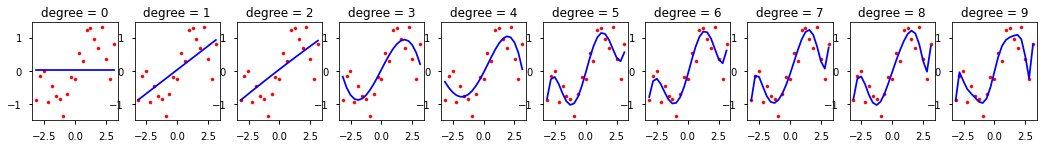

In [18]:
fig = plt.figure(figsize=(18, 1.8)) 
gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=10, # col 몇 개 
                       height_ratios=[1], 
                       width_ratios=[1]*10)
                      
for d in params:
    ax = plt.subplot(gs[d], title='degree = '+str(d))
    ax.scatter(x_train, y_train, color='r', s=10)
    ax.plot(x_train, y_train_pred_total[d], 'b-')

plt.show()

# <a id='MSE'>5. Plot the MSE</a>

> Plot the MSE as a function of the polynomial degree given the vectors/lists obtained in step 4-iii: <br>
📌Note: Be sure to add xlabel, ylabel and legend accordingly. <br>

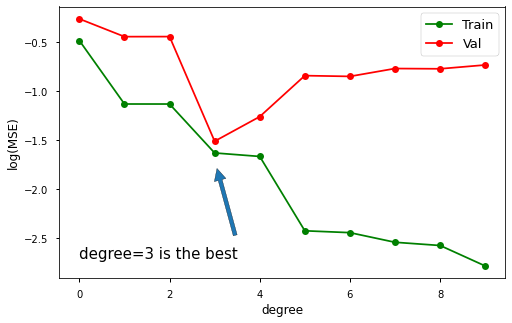

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(params, np.log(mse_train_total), 'g-', marker='o', label='Train')
plt.plot(params, np.log(mse_val_total), 'r-', marker='o', label='Val')
plt.xlabel('degree', fontsize=12)
plt.ylabel('log(MSE)', fontsize=12)
plt.legend(loc='upper right', prop={'size': 13}, edgecolor='gray')
plt.annotate('degree=3 is the best', xy=(3, -1.7), xytext=(0, -2.7), fontsize=15, arrowprops=dict(shrink=0.1))
plt.show()

<center><a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Move to TOP</a><center>